In [17]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv(r"D:\DATA ANALYTICS\Python\Projects\web_traffic_analysis_project\data\web_traffic.csv")
df = pd.DataFrame(data)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VisitID          10 non-null     int64 
 1   Date             10 non-null     object
 2   UserType         10 non-null     object
 3   Device           10 non-null     object
 4   SessionDuration  10 non-null     int64 
 5   PagesVisited     10 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 612.0+ bytes
None


In [23]:
print(df.describe())

        VisitID  SessionDuration  PagesVisited
count  10.00000        10.000000     10.000000
mean    5.50000       247.000000      4.400000
std     3.02765        83.672643      1.349897
min     1.00000       120.000000      3.000000
25%     3.25000       195.000000      3.250000
50%     5.50000       230.000000      4.000000
75%     7.75000       290.000000      5.000000
max    10.00000       400.000000      7.000000


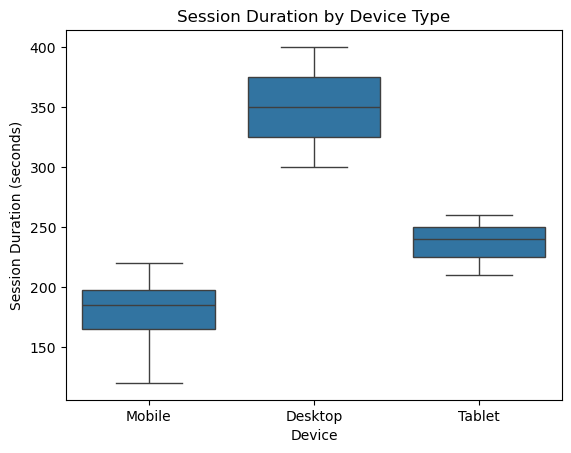

In [25]:
sns.boxplot(x=df["Device"], y=df["SessionDuration"])
plt.title("Session Duration by Device Type")
plt.xlabel("Device")
plt.ylabel("Session Duration (seconds)")
plt.show()


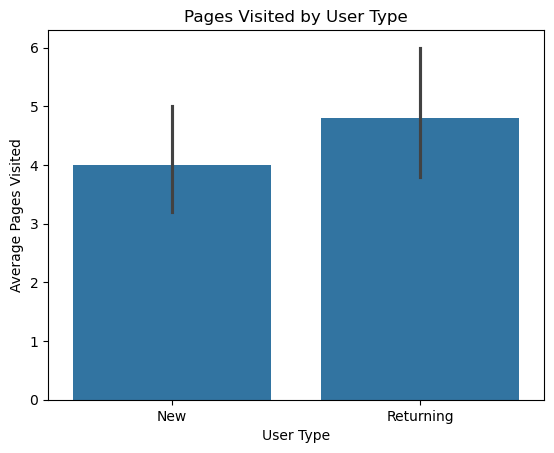

In [27]:
sns.barplot(x=df["UserType"], y=df["PagesVisited"])
plt.title("Pages Visited by User Type")
plt.xlabel("User Type")
plt.ylabel("Average Pages Visited")
plt.show()


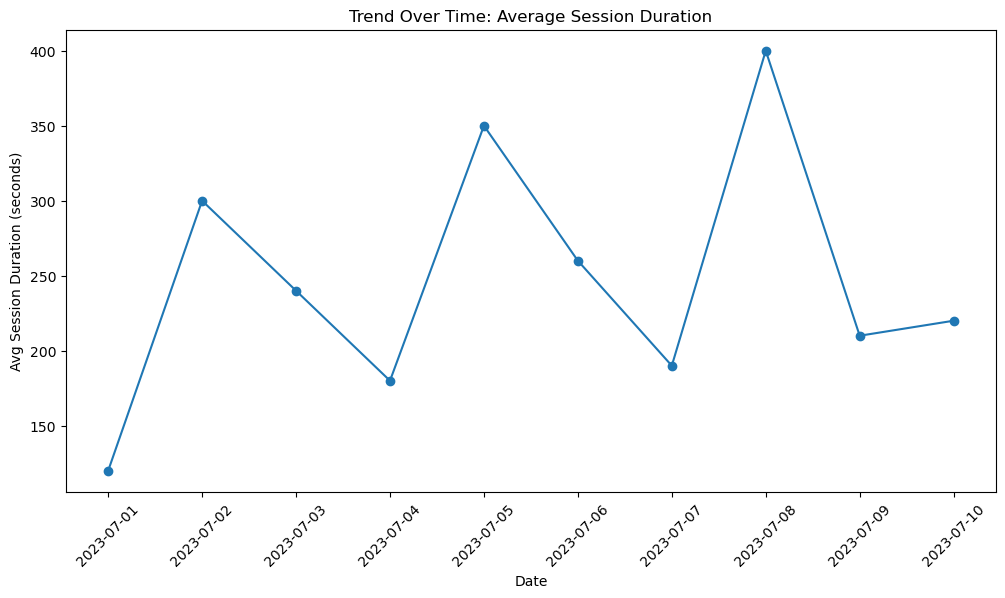

In [29]:
df["Date"] = pd.to_datetime(df["Date"])
daily_trend = df.groupby("Date")["SessionDuration"].mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_trend.index, daily_trend.values, marker="o", linestyle="-")
plt.title("Trend Over Time: Average Session Duration")
plt.xlabel("Date")
plt.ylabel("Avg Session Duration (seconds)")
plt.xticks(rotation=45)
plt.show()


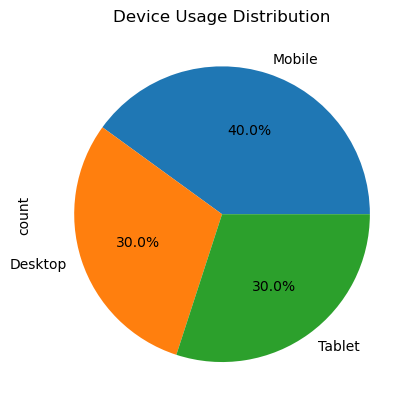

In [31]:
df["Device"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Device Usage Distribution")
plt.show()


In [33]:
traffic_per_day = df.groupby("Date")["VisitID"].count()
top_traffic_days = traffic_per_day.nlargest(5)
print("Top 5 Traffic Days:\n", top_traffic_days)


Top 5 Traffic Days:
 Date
2023-07-01    1
2023-07-02    1
2023-07-03    1
2023-07-04    1
2023-07-05    1
Name: VisitID, dtype: int64
